# Approach:
[reference](https://www.researchgate.net/publication/334719327_DeepRoof_A_Data-driven_Approach_For_Solar_Potential_Estimation_Using_Rooftop_Imagery)

- The marching square algorithm to approximate the line along the edges where the orientation value changes.
- Associate a contour with the candidate building, if it is intersect with the building outline.
- We end up with outlines for each planer that belong to a roof segment.
- Lastly approximate the height and the pitch of the contours as well as height of near by structures relying on a third party to create the pitch and the height matrix for a building

**assumptions:**
- The orientation values are similar for a given roof sgment (The roof has the same pitch)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math 
import cv2
from PIL import Image, ImageDraw



# The Marching Square Algorithm
**Reference**
- [The Marching Algorithm in Python](https://stackoverflow.com/questions/63941088/marching-square-algorithm-in-python)
- [Coding the marching square in Java](https://www.youtube.com/watch?v=0ZONMNUKTfU&t=1052s&ab_channel=TheCodingTrain) 

In [12]:
class Square():
    A = [0, 0]
    B = [0, 0]
    C = [0, 0]
    D = [0, 0]
    
    A_data = 0.0
    B_data = 0.0
    C_data = 0.0
    D_data = 0.0
    
    def GetCaseId(self, threshold):
        caseId = 0
        if (self.A_data >= threshold):
            caseId |= 1
        if (self.B_data >= threshold):
            caseId |= 2
        if (self.C_data >= threshold):
            caseId |= 4
        if (self.D_data >= threshold):
            caseId |= 8
            
        return caseId
    
    def GetLines(self, Threshold):
        lines = []
        caseId = self.GetCaseId(Threshold)
        
        if caseId in (1, 14, 10):
            pX = (self.A[0] + self.B[0]) / 2
            pY = self.B[1]
            qX = self.D[0]
            qY = (self.A[1] + self.D[1]) / 2

            line = (pX, pY, qX, qY)

            lines.append(line)
        if caseId in (3, 12):
            pX = self.A[0]
            pY = (self.A[1] + self.D[1]) / 2
            qX = self.C[0]
            qY = (self.B[1] + self.C[1]) / 2

            line = (pX, pY, qX, qY)

            lines.append(line)

        if caseId in (4, 11, 10):
            pX = (self.C[0] + self.D[0]) / 2
            pY = self.D[1]
            qX = self.B[0]
            qY = (self.B[1] + self.C[1]) / 2

            line = (pX, pY, qX, qY)

            lines.append(line)

        elif caseId in (6, 9):
            pX = (self.A[0] + self.B[0]) / 2
            pY = self.A[1]
            qX = (self.C[0] + self.D[0]) / 2
            qY = self.C[1]

            line = (pX, pY, qX, qY)

            lines.append(line)

        elif caseId in (7, 8, 5):
            pX = (self.C[0] + self.D[0]) / 2
            pY = self.C[1]
            qX = self.A[0]
            qY = (self.A[1] + self.D[1]) / 2

            line = (pX, pY, qX, qY)

            lines.append(line)

        return lines
    

def marching_square(xVector, yVector, Data, threshold):
    linesList = []
    
    Height = len(Data) # rows
    Width = len(Data[1]) # cols
    
    if ((Width == len(xVector)) and (Height == len(yVector))):
        squares = np.full((Height - 1, Width - 1), Square())

        sqHeight = squares.shape[0]  # rows count
        sqWidth = squares.shape[1]  # cols count

        for j in range(sqHeight):  # rows
            for i in range(sqWidth):  # cols
                a = Data[j + 1, i]
                b = Data[j + 1, i + 1]
                c = Data[j, i + 1]
                d = Data[j, i]
                A = [xVector[i], yVector[j + 1]]
                B = [xVector[i + 1], yVector[j + 1]]
                C = [xVector[i + 1], yVector[j]]
                D = [xVector[i], yVector[j]]

                squares[j, i].A_data = a
                squares[j, i].B_data = b
                squares[j, i].C_data = c
                squares[j, i].D_data = d

                squares[j, i].A = A
                squares[j, i].B = B
                squares[j, i].C = C
                squares[j, i].D = D

                list = squares[j, i].GetLines(threshold)

                linesList = linesList + list
    else:
        raise AssertionError

    return [linesList]   
            
            
            
        

## Testing our Algorithm

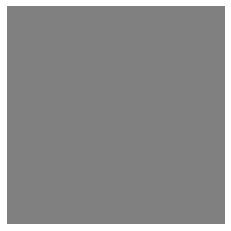

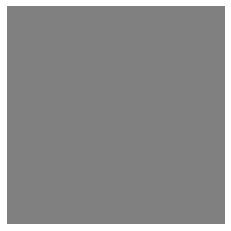

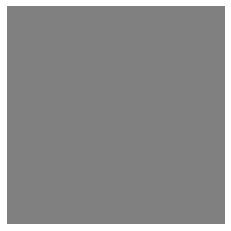

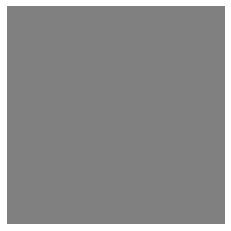

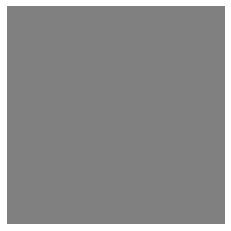

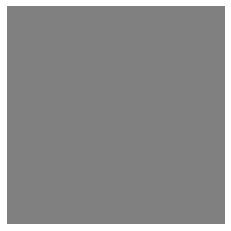

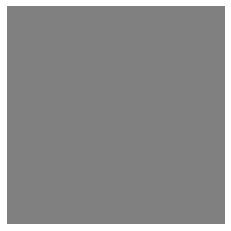

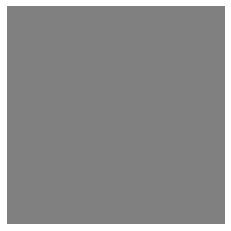

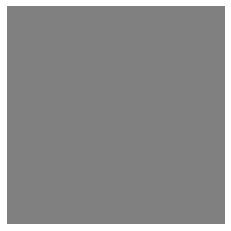

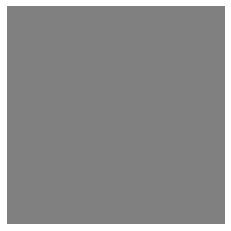

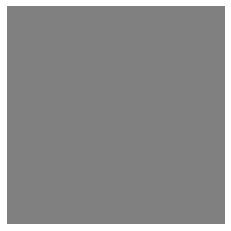

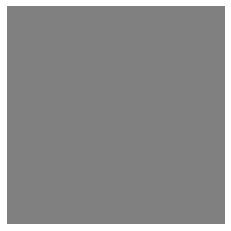

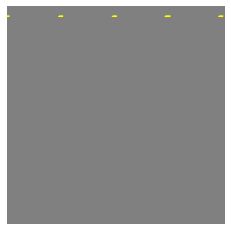

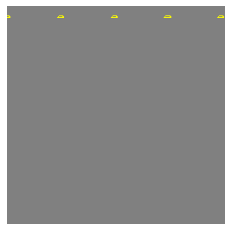

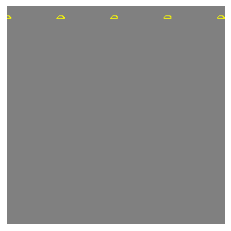

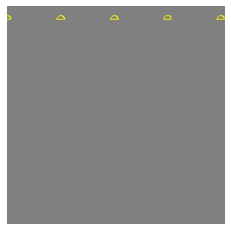

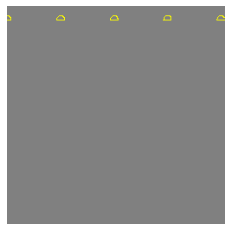

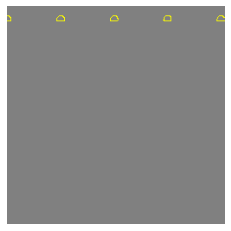

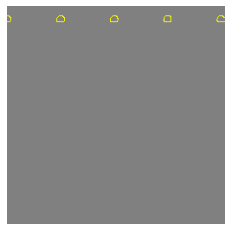

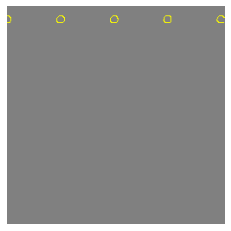

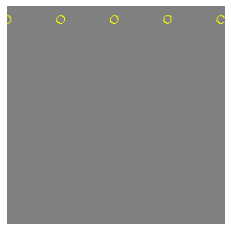

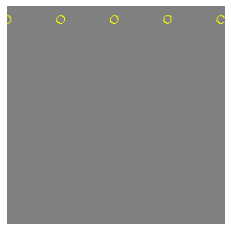

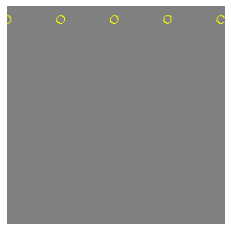

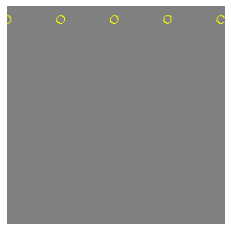

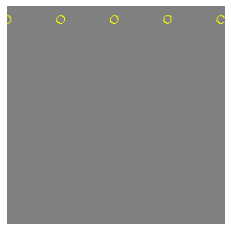

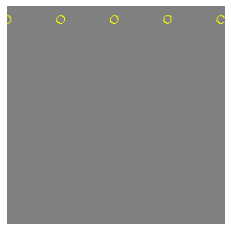

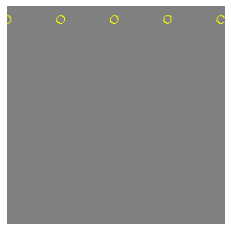

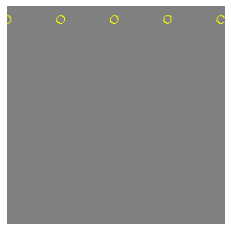

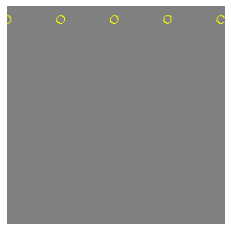

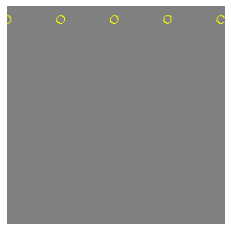

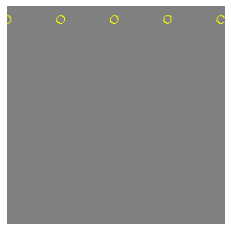

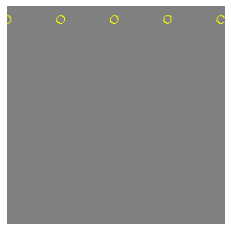

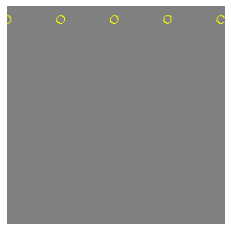

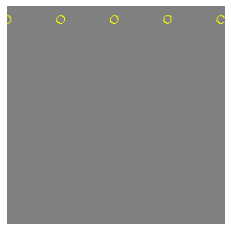

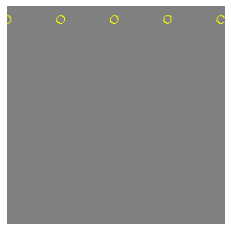

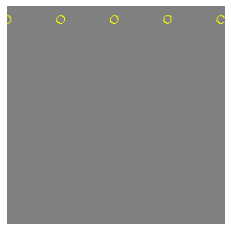

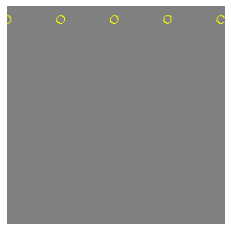

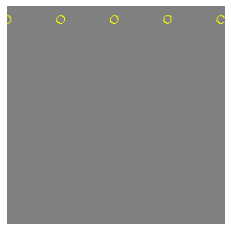

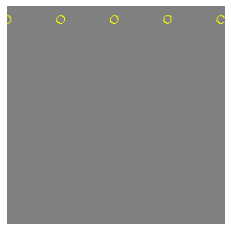

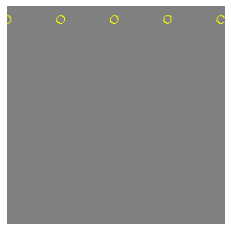

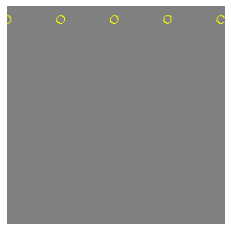

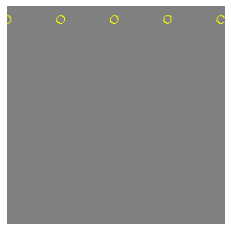

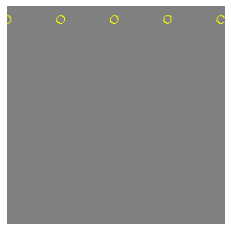

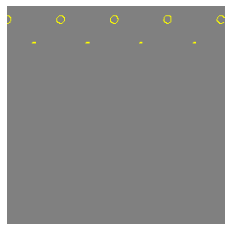

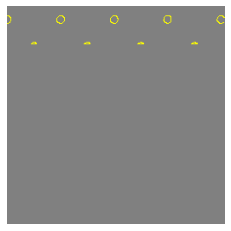

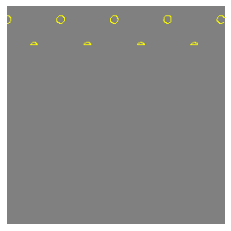

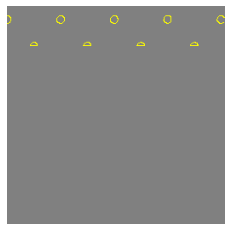

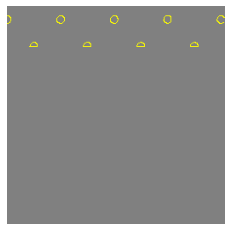

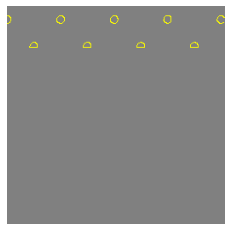

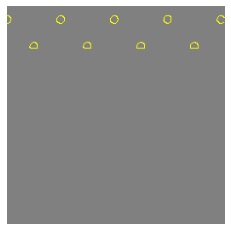

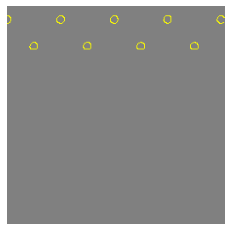

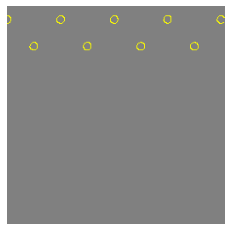

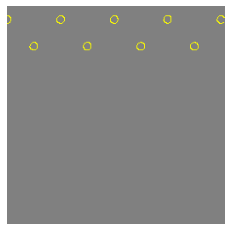

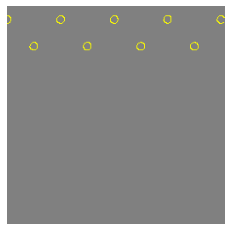

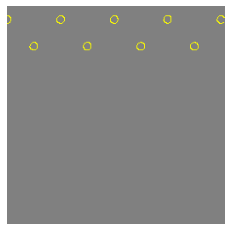

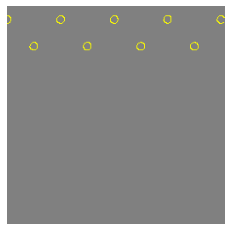

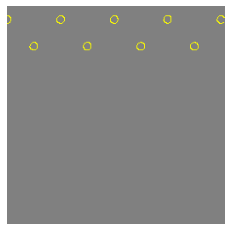

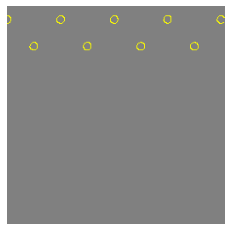

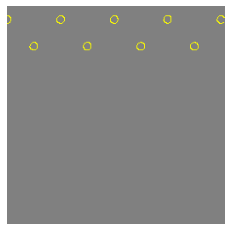

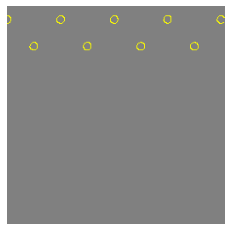

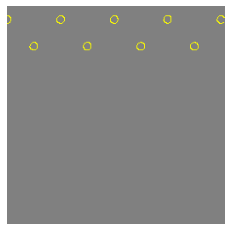

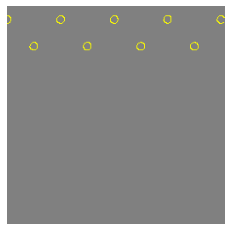

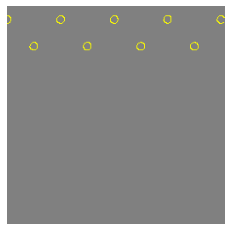

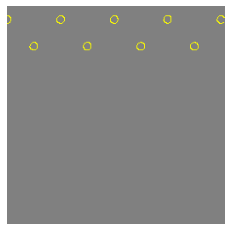

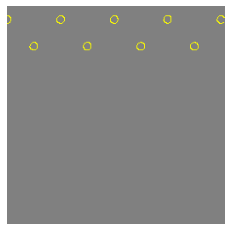

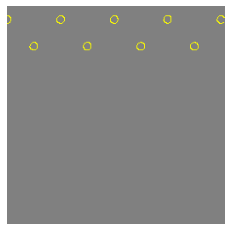

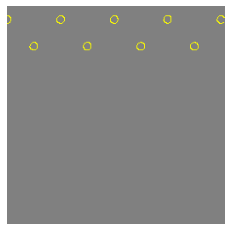

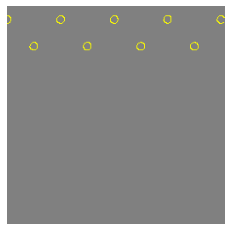

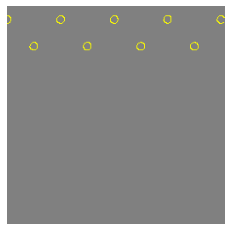

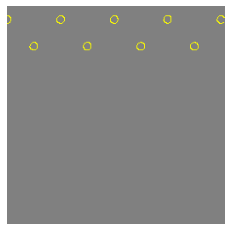

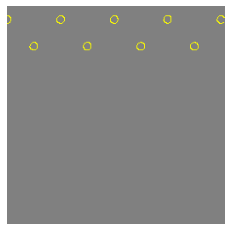

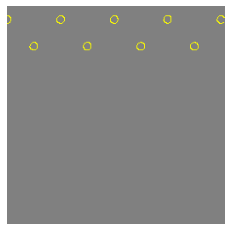

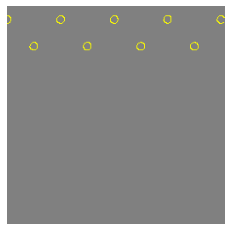

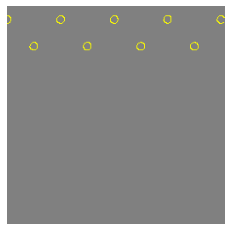

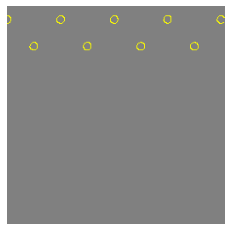

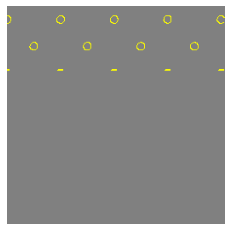

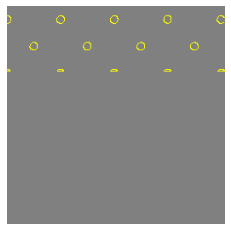

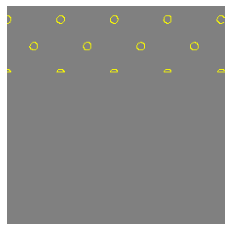

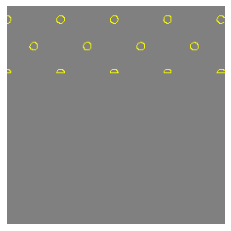

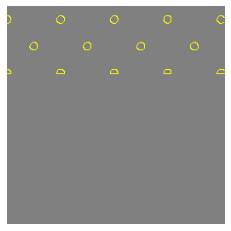

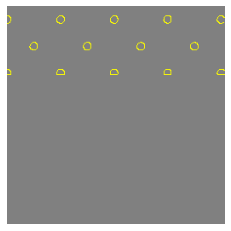

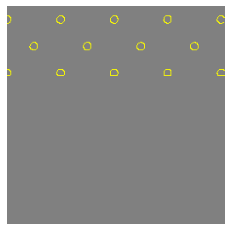

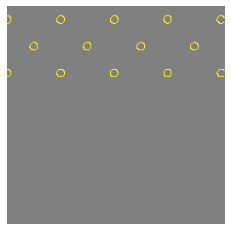

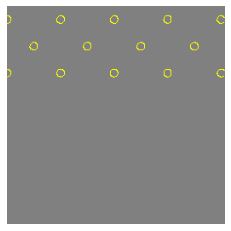

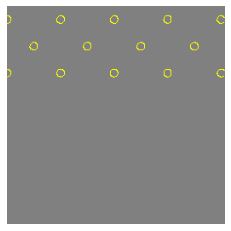

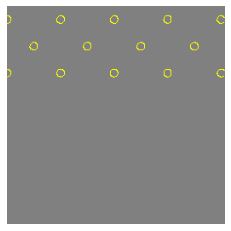

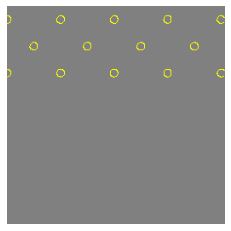

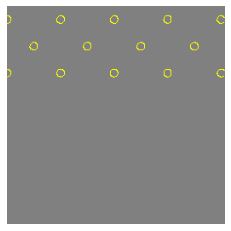

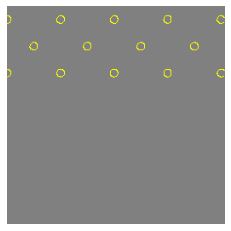

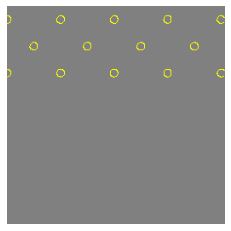

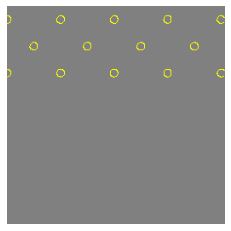

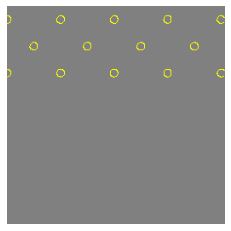

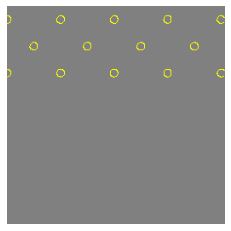

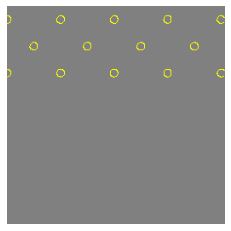

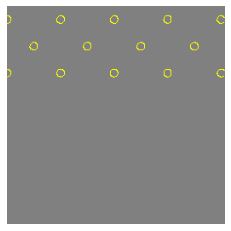

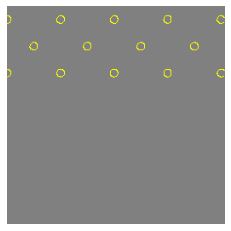

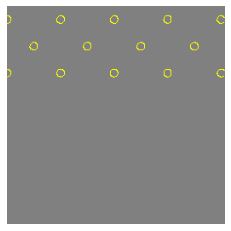

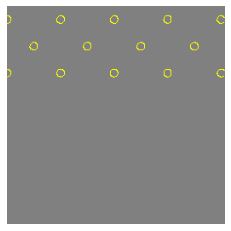

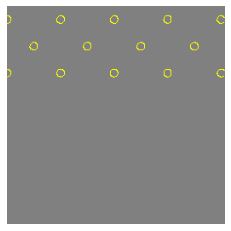

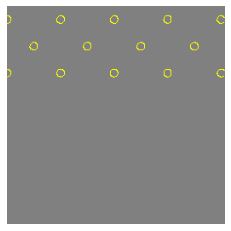

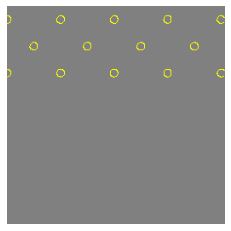

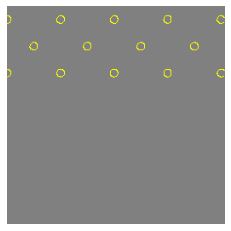

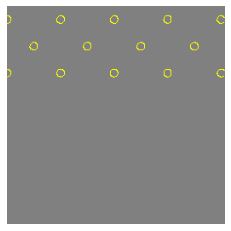

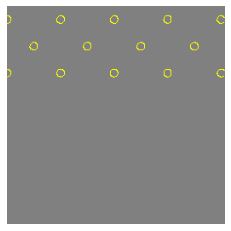

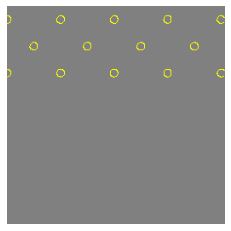

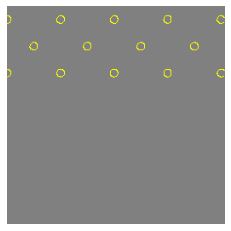

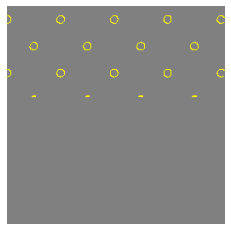

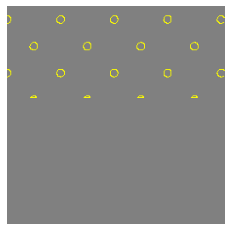

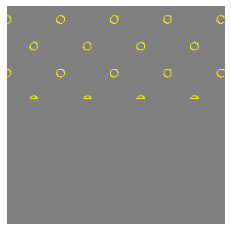

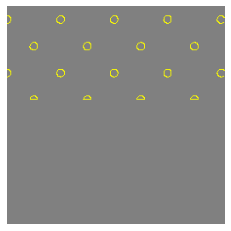

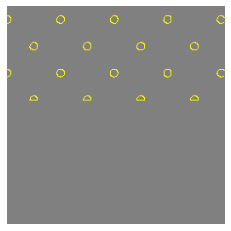

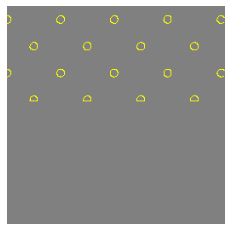

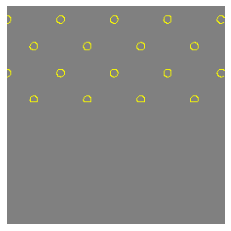

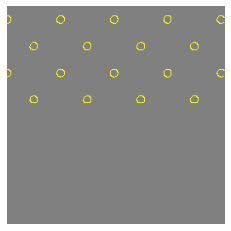

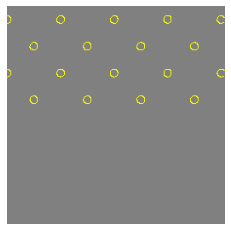

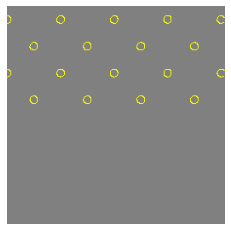

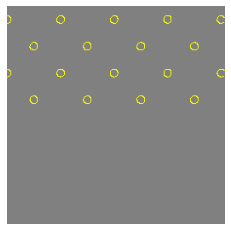

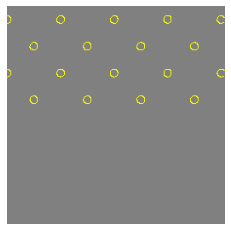

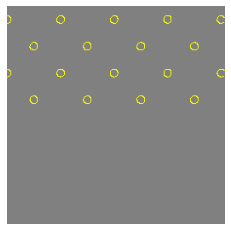

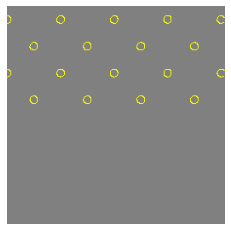

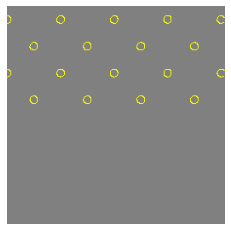

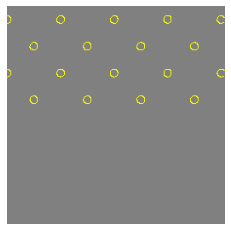

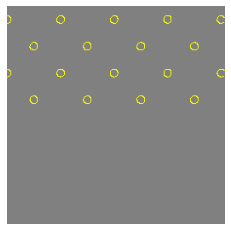

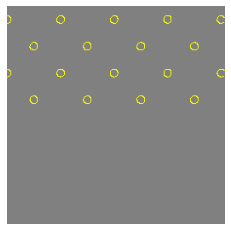

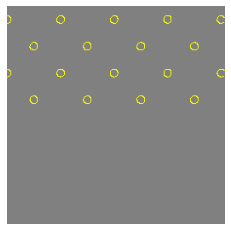

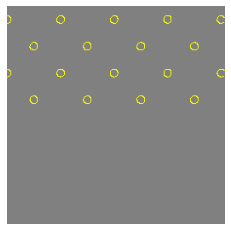

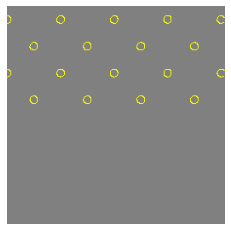

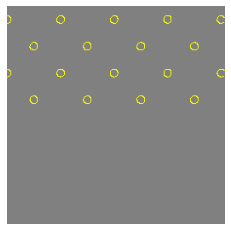

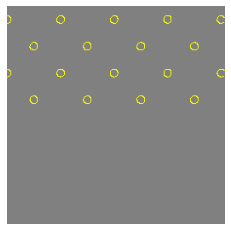

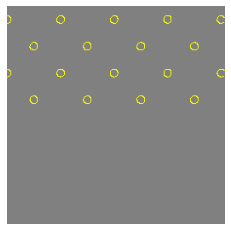

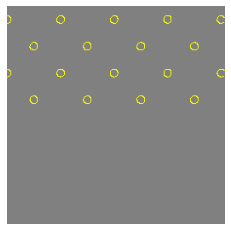

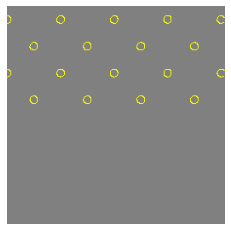

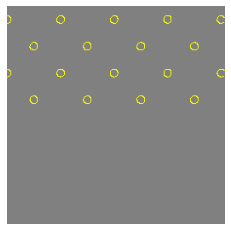

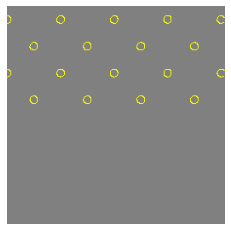

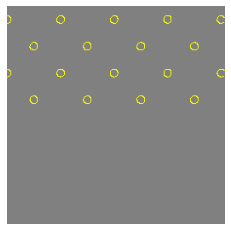

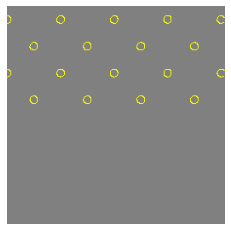

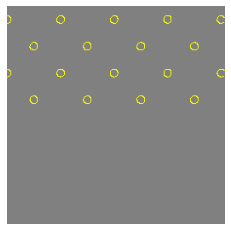

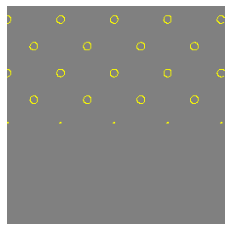

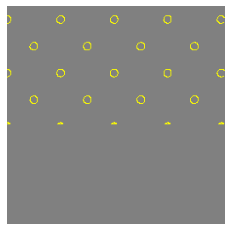

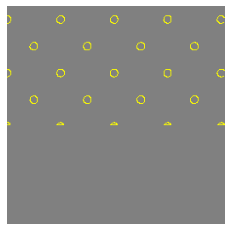

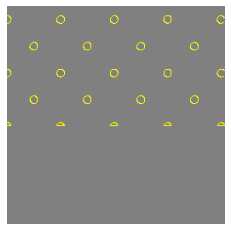

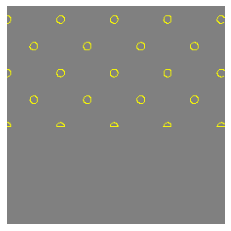

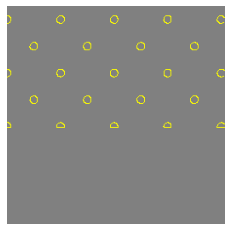

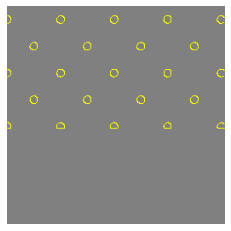

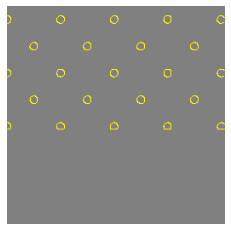

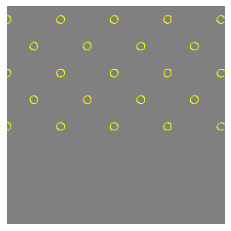

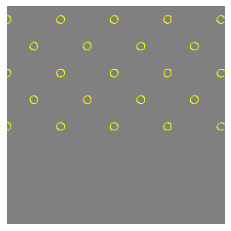

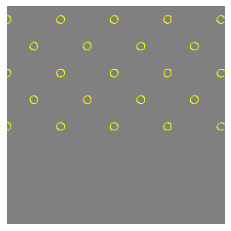

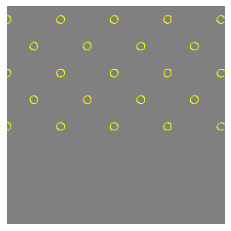

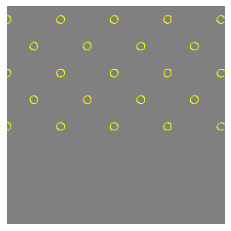

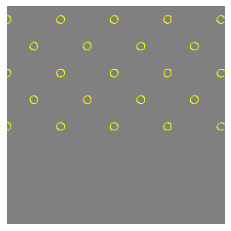

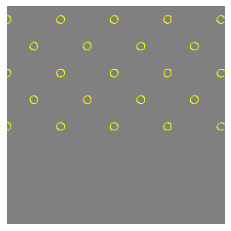

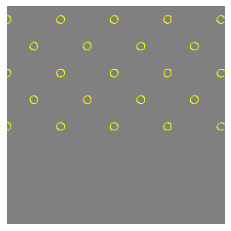

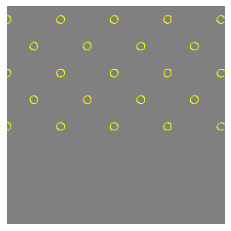

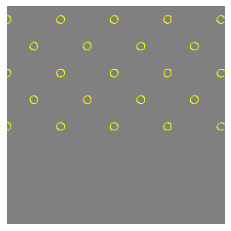

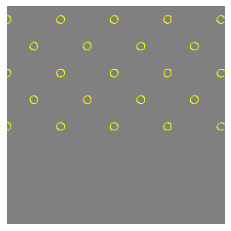

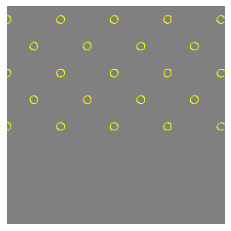

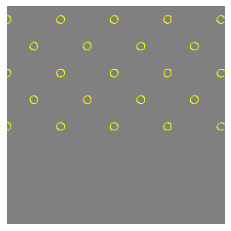

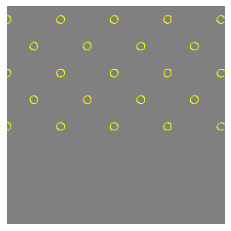

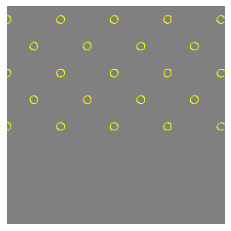

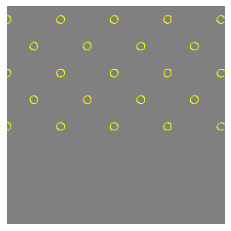

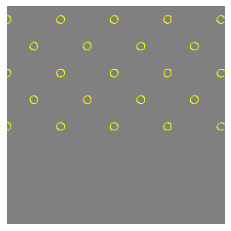

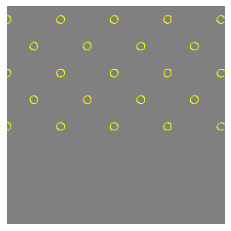

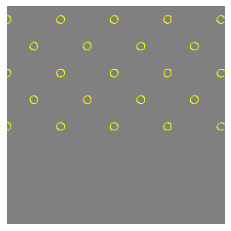

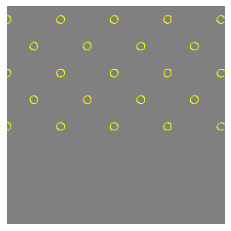

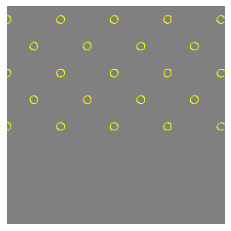

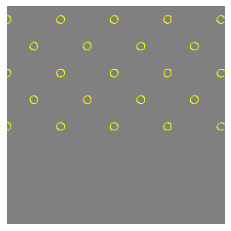

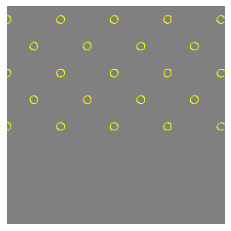

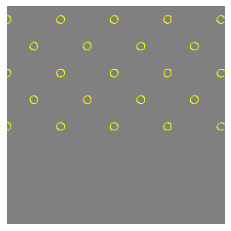

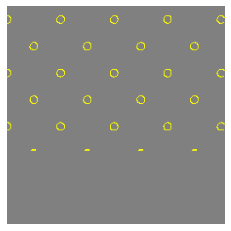

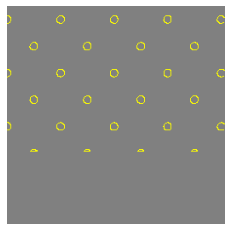

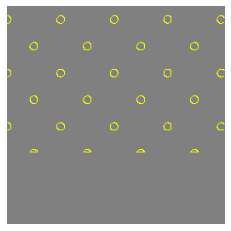

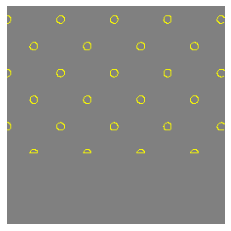

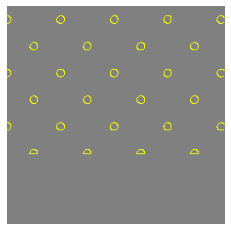

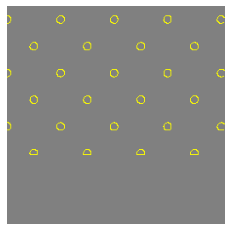

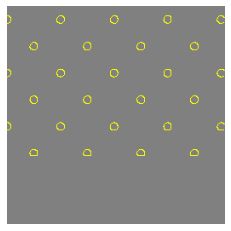

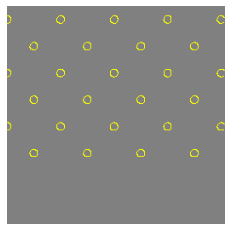

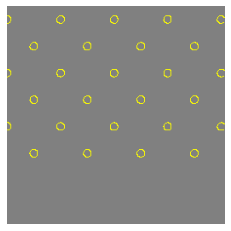

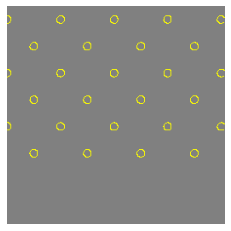

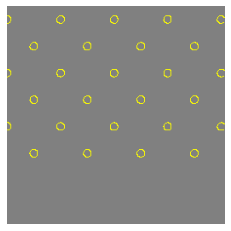

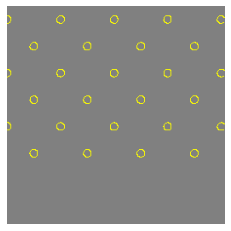

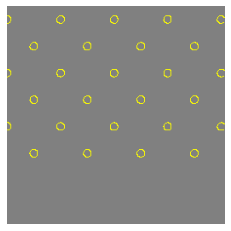

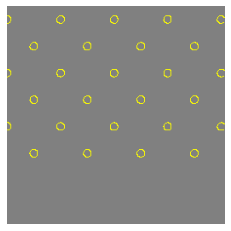

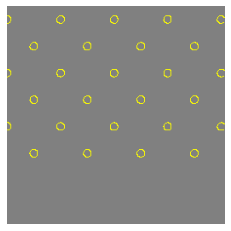

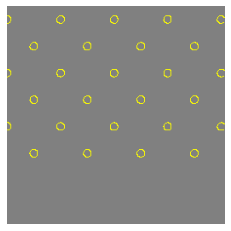

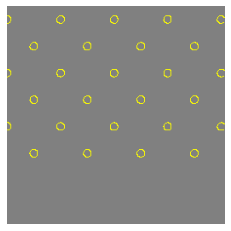

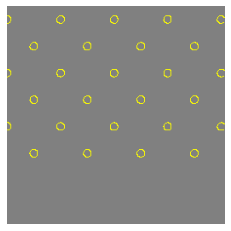

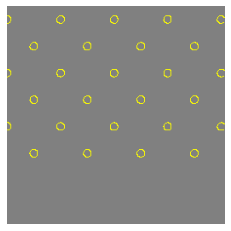

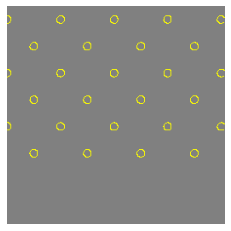

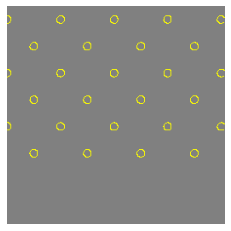

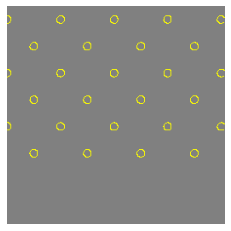

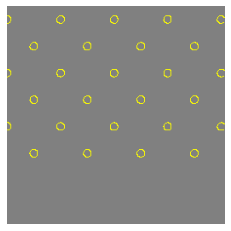

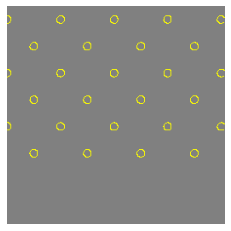

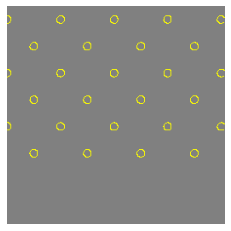

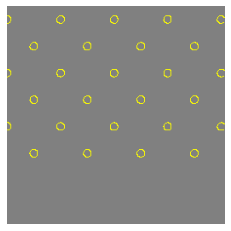

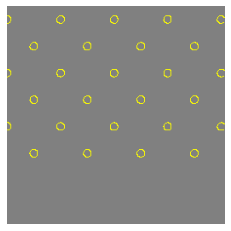

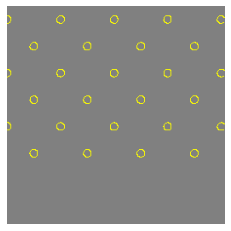

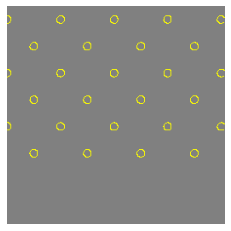

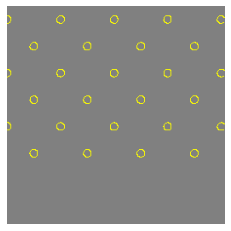

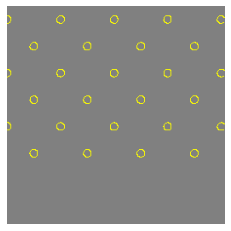

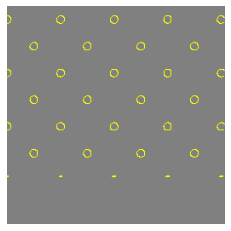

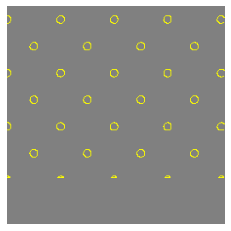

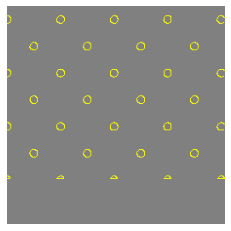

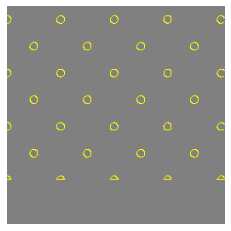

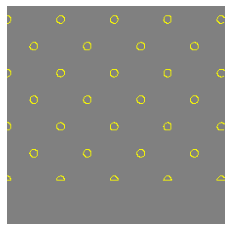

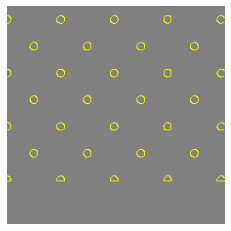

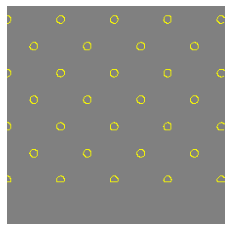

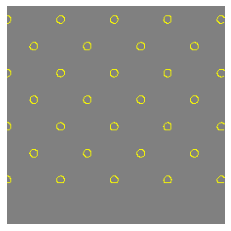

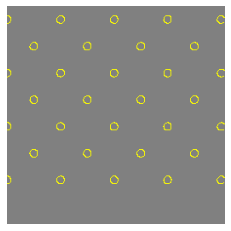

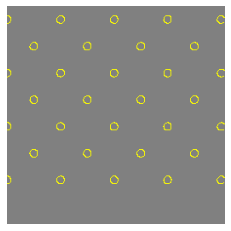

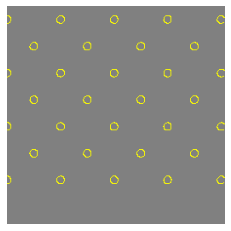

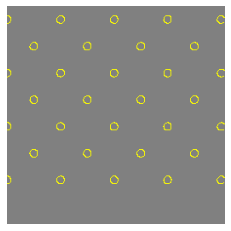

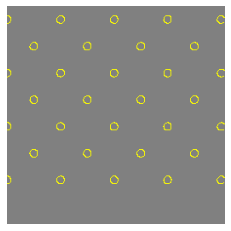

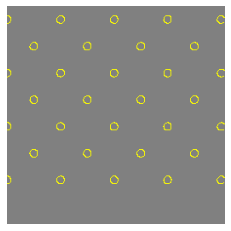

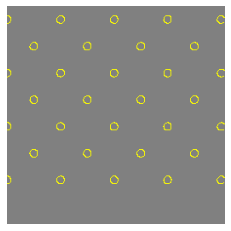

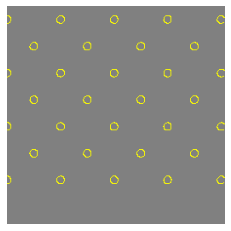

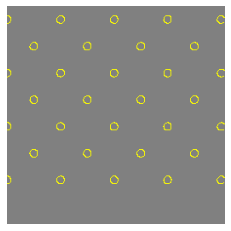

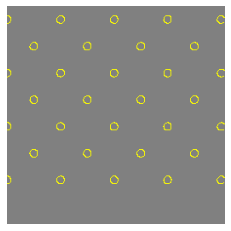

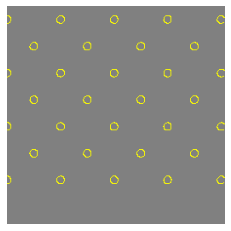

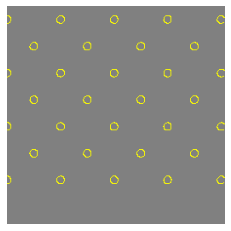

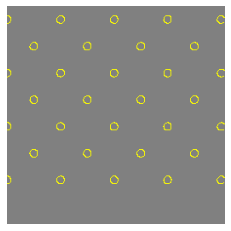

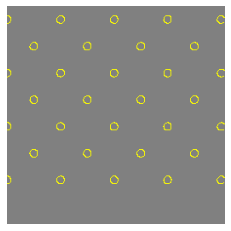

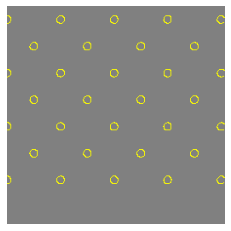

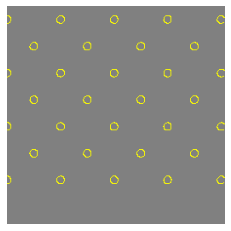

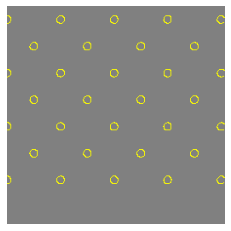

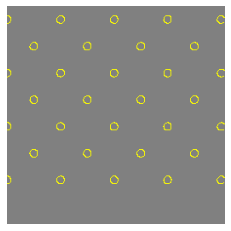

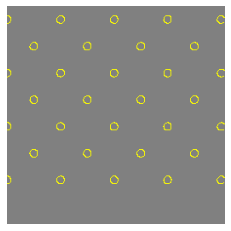

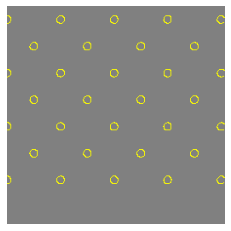

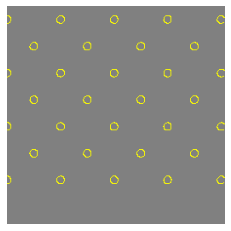

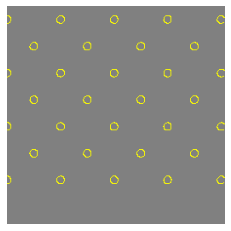

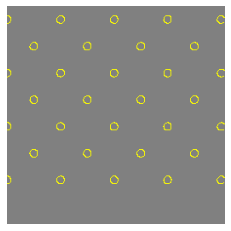

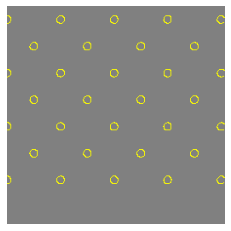

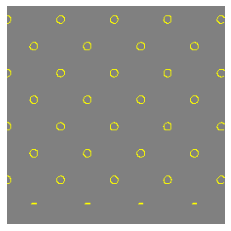

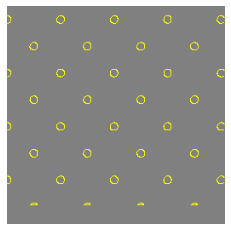

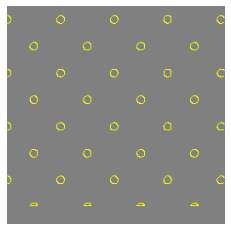

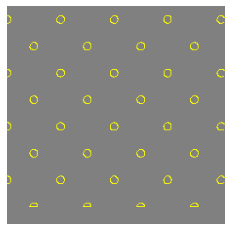

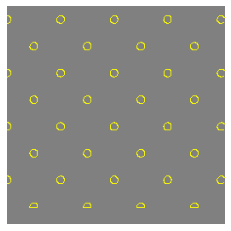

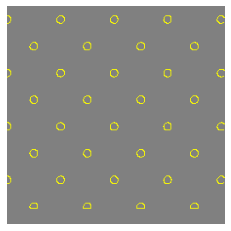

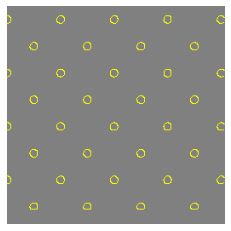

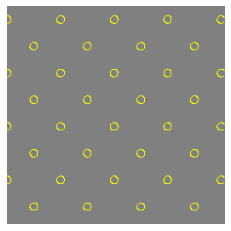

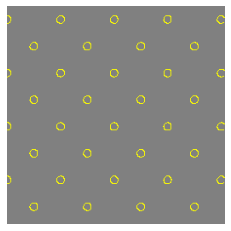

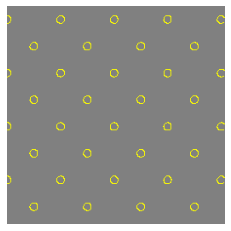

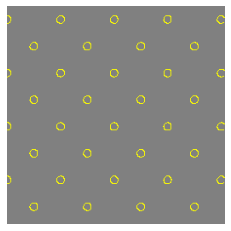

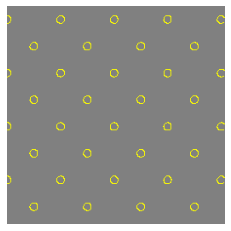

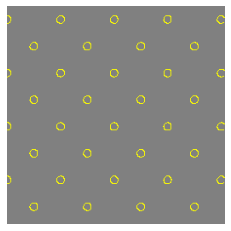

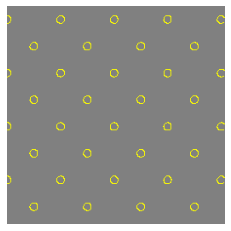

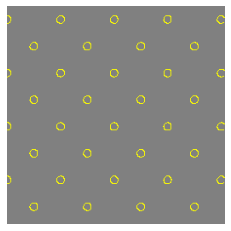

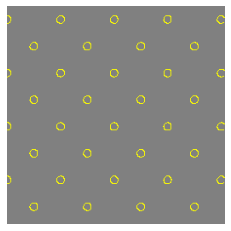

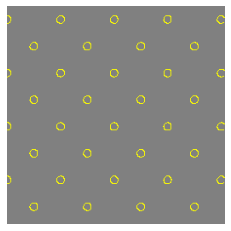

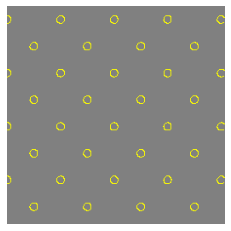

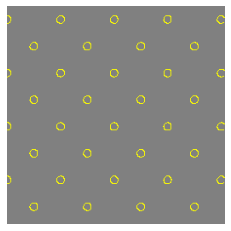

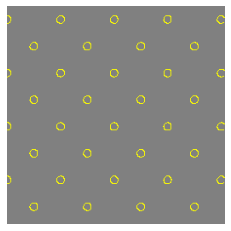

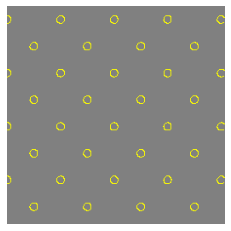

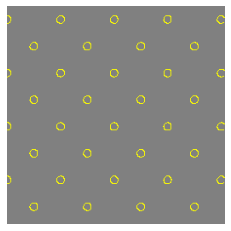

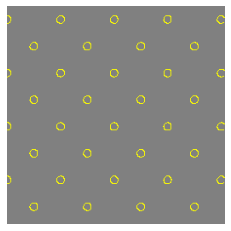

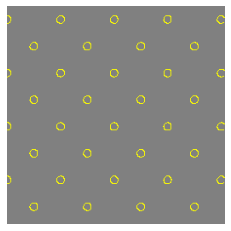

In [15]:
%matplotlib inline
x = [i for i in range(256)]
y = [i for i in range(256)]
    
example_l = [[0 for i in range(256)] for j in range(256)]
    
for i in range(len(example_l)):
    for j in range(len(example_l[0])):
        example = example
        example_l[i][j] = math.sin(i / 10.0)*math.cos(j / 10.0)
    example = np.array(example_l)

    im = Image.new('RGB', (256, 256), (128, 128, 128))

    collection = marching_square(x, y, example, 0.9)

    draw = ImageDraw.Draw(im)

    for ln in collection:
        for toup in ln:
            draw.line(toup, fill=(255, 255, 0), width=1)

    plt.axis("off")
    plt.imshow( im )
    plt.show()

## Run the Algorithm on one of our Images

In [ ]:
img = cv2.imread('D:/file.png')
print(img.shape)
example = img.copy()
example = example[:, :, 0]
print(example.shape)

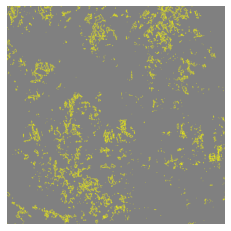

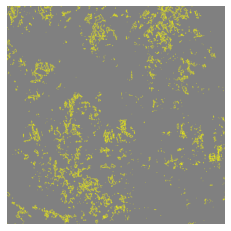

KeyboardInterrupt: 

In [20]:
%matplotlib inline
x = [i for i in range(900)]
y = [i for i in range(900)]
    
example_l = [[0 for i in range(900)] for j in range(900)]
    
for i in range(len(example_l)):
    im = Image.new('RGB', (900, 900), (128, 128, 128))
    collection = marching_square(x, y, example, 0.9)
    draw = ImageDraw.Draw(im)

    for ln in collection:
        for toup in ln:
            draw.line(toup, fill=(255, 255, 0), width=1)

    plt.axis("off")
    plt.imshow( im )
    plt.show()

**Approach**
- We can cut off buildings roofs from the images
- Perform the, arching squares on the roofs to extract the panals

# Reference
- https://stackoverflow.com/questions/3929278/what-does-ior-do-in-python